In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
computes = []
energy = []
cycles = []
pjs = []
gflops = []

In [30]:

for i in range(1,13):
    df1 = pd.read_csv("sparse_arch/04.2.2-eyeriss-like-gating-mapspace-search/sparse_layers/sparse_pointNet_layer{}/summary_output.csv".format(i))
    df2 = pd.read_csv("sparse_arch/04.2.2-eyeriss-like-gating-mapspace-search/dense_layers/dense_pointNet_layer{}/summary_output.csv".format(i))
    
    computes.append([df1["Actual Computes"][0], df2['Actual Computes'][0]])
    energy.append([df1["Energy"][0], df2['Energy'][0]])
    cycles.append([df1["Cycles"][0], df2['Cycles'][0]])
    gflops.append([df1["GFLOPs"][0], df2['GFLOPs'][0]])
    pjs.append([df1["Total_pJ_Actual_Compute"][0], df2['Total_pJ_Actual_Compute'][0]])




In [31]:
# df['Algorithmic Computes'][0]
energy = np.array(energy)
gflops = np.array(gflops)
cycles = np.array(cycles)
computes = np.array(computes)
pjs = np.array(pjs)

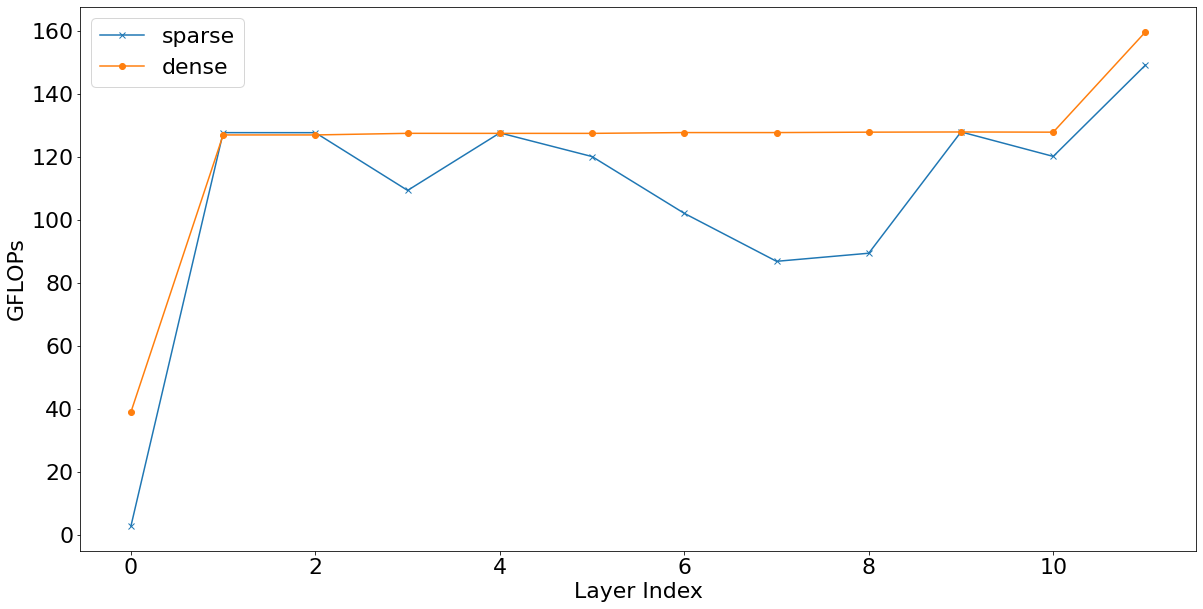

In [37]:
import matplotlib
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(20,10))


plt.plot(range(12), gflops[:,0], marker = "x", label="sparse")
plt.plot(range(12), gflops[:,1], marker = "o", label="dense")

plt.xlabel("Layer Index")
plt.ylabel("GFLOPs")


plt.legend()


# plt.savefig("plots/gflops.pdf", dpi=200)

In [38]:
sparse_df = pd.read_csv("Layer-wise-sparsities.csv")

In [39]:
weight_density = sparse_df['Weight Density']

In [40]:
energy_ratio = energy[:,0]/energy[:,1]
gflops_ratio = gflops[:,0]/gflops[:,1]
cycles_ratio = cycles[:,0]/cycles[:,1]
computes_ratio = computes[:,0]/computes[:,1]
pjs_ratio = pjs[:,0]/pjs[:,1]


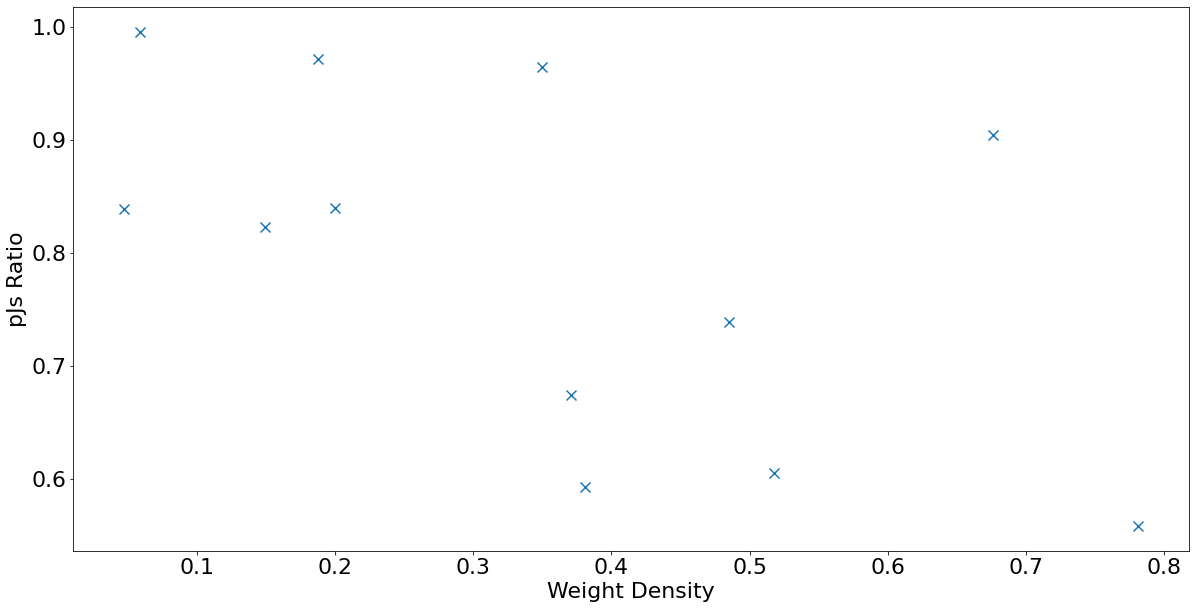

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(list(weight_density), pjs_ratio, marker = "x", s=100)
# plt.plot(range(11), cycles[:,1], marker = "o", label="dense")

plt.xlabel("Weight Density")
plt.ylabel("pJs Ratio")


# plt.legend()
plt.savefig("plots/ratio_pjs.pdf")

In [22]:
len(energy_ratio)

11